In [1]:
import json
from urllib.request import urlopen
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

In [2]:
api_url = "https://data.cityofnewyork.us/resource/qiz3-axqb.csv?"
field_list = [
    "date,time,",
    "latitude,longitude,",
    "borough,cross_street_name,on_street_name,off_street_name,",
    "number_of_cyclist_injured,number_of_cyclist_killed,",
    "number_of_pedestrians_injured,number_of_pedestrians_killed,",
    "contributing_factor_vehicle_1,contributing_factor_vehicle_2,",
    "vehicle_type_code1,vehicle_type_code2,",
    "unique_key",
]
api_parts = [
    api_url, 
    "$select="+"".join(field_list), 
    "&$where=number_of_cyclist_injured>0%20or%20number_of_cyclist_killed>0",
    "&$limit=5000000"]
full_url = "".join(api_parts)
print("Fetchin' data from:", full_url)
raw_data = pd.read_csv(full_url)

Fetchin' data from: https://data.cityofnewyork.us/resource/qiz3-axqb.csv?$select=date,time,latitude,longitude,borough,cross_street_name,on_street_name,off_street_name,number_of_cyclist_injured,number_of_cyclist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,unique_key&$where=number_of_cyclist_injured>0%20or%20number_of_cyclist_killed>0&$limit=5000000


In [3]:
raw_data[1:5]

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,date,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,off_street_name,on_street_name,time,unique_key,vehicle_type_code1,vehicle_type_code2
1,MANHATTAN,Driver Inattention/Distraction,Unspecified,NaN,2017-03-20T00:00:00.000,40.71436,-74.00839,1,0,0,0,WARREN STREET,CHURCH STREET,13:00,3635630,SPORT UTILITY / STATION WAGON,BICYCLE
2,BRONX,Unsafe Lane Changing,NaN,NaN,2017-03-20T00:00:00.000,40.81162,-73.93117,1,0,0,0,EAST 135 STREET,PARK AVENUE,8:45,3635736,BICYCLE,NaN
3,NaN,Failure to Yield Right-of-Way,Unspecified,NaN,2017-03-20T00:00:00.000,NaN,NaN,1,0,0,0,NaN,101 AVENUE,7:05,3635863,BICYCLE,SPORT UTILITY / STATION WAGON
4,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,NaN,2017-03-20T00:00:00.000,40.71076,-73.95314,1,0,0,0,SOUTH 1 STREET,BORINQUEN PLACE,17:00,3635931,SPORT UTILITY / STATION WAGON,BICYCLE


In [4]:
clean_data = raw_data.copy()
clean_data["date"] = clean_data["date"].astype("datetime64")
clean_data["time"] = pd.to_datetime(clean_data["time"])
clean_data["time"] = clean_data["time"].dt.hour + clean_data["time"].dt.minute/60

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


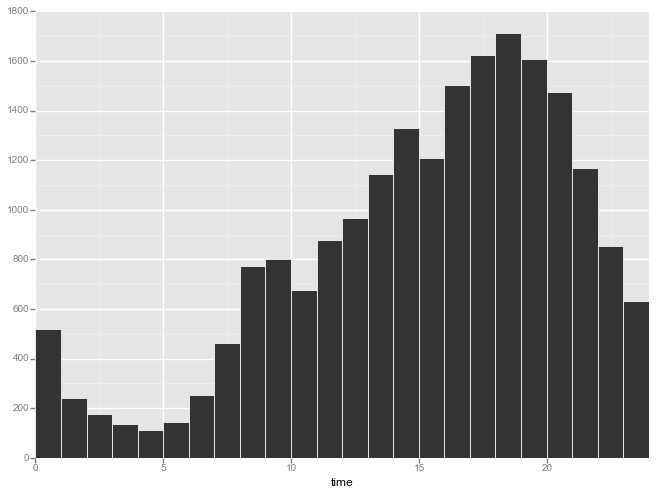

<ggplot: (-9223363308285072654)>

In [5]:
from ggplot import *
ggplot(aes(x='time'), data=clean_data) + geom_histogram(binwidth=1) + xlim(0,24)

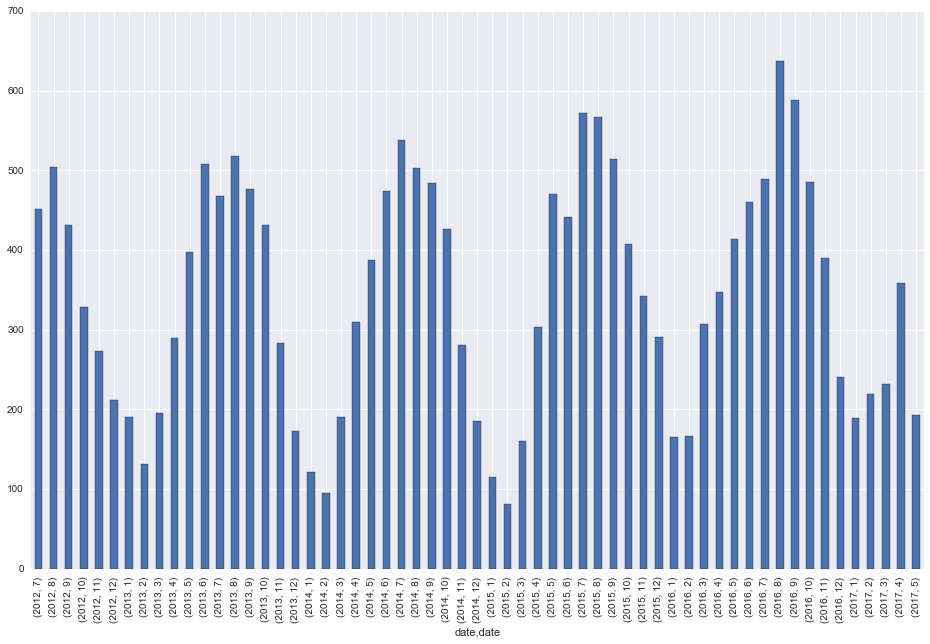

In [6]:
clean_data.groupby([clean_data["date"].dt.year, clean_data["date"].dt.month])["date"].count().plot(kind="bar", figsize=(16,10))